In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('C:/Users/USER/Desktop/Al Rayan Real Estate.csv')
data.head(10)

,Property ID,Location,Property Type,Plot Size,Building Area,Build Material,Floors,Basement,Furnished,Main Street,Streets Access,Sanatation Network,Asphalt Street,Finishing Grade,Build Year,Pre-owned,Property Status,Garage Capacity,Price
0,344,Artil,Villa,12.0,5.2,Stone,2.0,No,No,No,1,Yes,No,Delux,2020.0,No,Free,4.0,377000
1,345,Bayt Baws,Commercial Building,6.0,5.1,Stone & Cinder Blocks,4.0,No,No,Yes,1,Yes,Yes,Commercial,2020.0,No,Free,6.0,507000
2,346,Asbahi,Commercial Building,7.0,6.0,Stone & Cinder Blocks,6.0,Yes,No,Yes,2,Yes,Yes,Commercial,2018.0,Yes,Free,5.0,520000
3,347,Artil,Commercial Building,9.0,7.7,Stone & Cinder Blocks,6.0,Yes,No,No,2,No,No,Commercial,2021.0,No,Free,4.0,512000
4,348,Haddah,Villa,14.0,6.0,Stone,2.0,No,No,Yes,1,Yes,Yes,Delux,2019.0,No,Free,4.0,346000
5,349,Haddah,Villa,8.0,3.4,Stone,2.0,Yes,No,No,2,Yes,Yes,Commercial,2020.0,No,Free,2.0,476000
6,350,Artil,Villa,15.7,6.8,Stone,2.0,Yes,No,No,3,No,No,Delux,2021.0,No,Free,3.0,466000
7,351,Haddah,Commercial Building,11.0,9.4,Stone,4.0,Yes,No,No,1,Yes,Yes,Commercial,2017.0,Yes,Free,6.0,1100000
8,352,Haddah,Villa,14.0,6.5,Stone,3.0,No,No,No,2,Yes,Yes,Commercial,2021.0,No,Waqif,4.0,492000
9,353,Asbahi,Villa,13.5,5.8,Stone & Cinder Blocks,2.0,No,No,Yes,1,Yes,Yes,Commercial,2015.0,Yes,Free,4.0,986000


In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

Property ID            0
Location               0
 Property Type         0
Plot Size              0
Building Area          0
Build Material         0
Floors                 0
Basement               0
Furnished              0
Main Street            0
Streets Access         0
Sanatation Network     0
Asphalt Street         0
Finishing Grade        0
Build Year             0
Pre-owned              0
Property Status        0
Garage Capacity        0
Price                  0
dtype: int64

In [9]:
raw_X = data.iloc[:, :18]
y = data.iloc[:, 18]

In [10]:
X = pd.get_dummies(data=raw_X)
X

,Property ID,Plot Size,Building Area,Floors,Streets Access,Build Year,Garage Capacity,Location _Artil,Location _Asbahi,Location _Bayt Baws,...,Sanatation Network _No,Sanatation Network _Yes,Asphalt Street_No,Asphalt Street_Yes,Finishing Grade_Commercial,Finishing Grade_Delux,Pre-owned _No,Pre-owned _Yes,Property Status _Free,Property Status _Waqif
0,344,12.0,5.2,2.0,1,2020.0,4.0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
1,345,6.0,5.1,4.0,1,2020.0,6.0,0,0,1,...,0,1,0,1,1,0,1,0,1,0
2,346,7.0,6.0,6.0,2,2018.0,5.0,0,1,0,...,0,1,0,1,1,0,0,1,1,0
3,347,9.0,7.7,6.0,2,2021.0,4.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,348,14.0,6.0,2.0,1,2019.0,4.0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,823,12.0,10.1,4.0,1,2019.0,4.0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
480,824,15.0,10.0,3.0,2,2020.0,4.0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
483,827,5.8,5.0,4.0,1,2018.0,0.0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
484,828,4.5,3.5,2.0,1,2021.0,2.0,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

composite_pipeline = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=False))

model = composite_pipeline.fit(X_train, y_train)
model.score(X_test, y_test)

0.7578746812458057

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

141903.30758894642

In [14]:
def is_correct(row):
    if row['True Performance'] == row['Predicted Performance']:
        return 'Yes'
    else:
        return 'No'

In [15]:
comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Difference'] = round(abs(y_pred - y_test)*100/y_test)
comparison

,True Performance,Predicted Performance,Difference
393,600000,585900.964150,2.0
78,947000,830150.432750,12.0
294,511000,570385.025332,12.0
420,428000,423448.559881,1.0
484,402000,466254.663115,16.0
...,...,...,...
57,739000,805779.279597,9.0
142,532000,619275.860825,16.0
24,573000,573700.595148,0.0
17,973000,794959.508051,18.0


In [16]:
from sklearn.ensemble import RandomForestRegressor


model_two = RandomForestRegressor()
model_two.fit(X_train,y_train)
model_two.score(X_test,y_test)

0.6495361827596584

<BarContainer object of 11 artists>

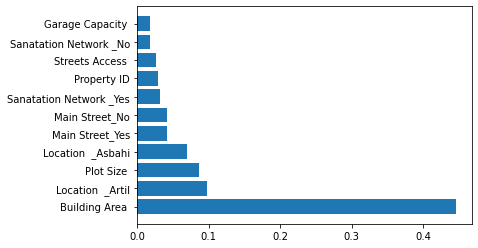

In [17]:
from matplotlib import pyplot as plt

importance = pd.DataFrame()
importance['Feature'] = X_train.columns
importance['Importance'] = model_two.feature_importances_
importance = importance.sort_values(by = ['Importance'], ascending = False)
importance = importance.head(11)
plt.barh(importance['Feature'], importance['Importance'])

In [25]:
import pickle 

file_name = 'model.sav'
pickle.dump(model, open(file_name, 'wb'))

In [20]:
X.isnull().sum()

Property ID                              0
Plot Size                                0
Building Area                            0
Floors                                   0
Streets Access                           0
Build Year                               0
Garage Capacity                          0
Location  _Artil                         0
Location  _Asbahi                        0
Location  _Bayt Baws                     0
Location  _Haddah                        0
 Property Type_Commercial Building       0
 Property Type_Villa                     0
Build Material _Stone                    0
Build Material _Stone                    0
Build Material _Stone & Cinder Blocks    0
Basement _No                             0
Basement _Yes                            0
Furnished _No                            0
Furnished _Yes                           0
Main Street_No                           0
Main Street_Yes                          0
Sanatation Network _No                   0
Sanatation 

In [21]:
reduced_X = X.iloc[:, [5,1,2,6,7,8,9,10,20,21,22,23]]
reduced_X.shape

(438, 12)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7193646190675902

In [26]:
file_name = 'RegressionModel.sav'
pickle.dump(model, open(file_name, 'wb'))

In [24]:
X_test

,Build Year,Plot Size,Building Area,Garage Capacity,Location _Artil,Location _Asbahi,Location _Bayt Baws,Location _Haddah,Main Street_No,Main Street_Yes,Sanatation Network _No,Sanatation Network _Yes
393,2020.0,7.0,5.9,1.0,0,0,1,0,0,1,0,1
78,2017.0,10.0,9.0,6.0,0,1,0,0,0,1,0,1
294,2016.0,10.0,9.0,1.0,0,0,1,0,0,1,0,1
420,2021.0,10.0,7.5,3.0,1,0,0,0,1,0,1,0
484,2021.0,4.5,3.5,2.0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020.0,12.3,8.0,3.0,0,0,0,1,1,0,0,1
142,2020.0,9.0,7.0,3.0,0,0,1,0,0,1,0,1
24,2020.0,7.0,5.0,2.0,0,0,0,1,0,1,0,1
17,2016.0,14.0,8.0,4.0,0,0,0,1,1,0,0,1
